In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
url="https://www.google.com/url?q=https%3A%2F%2Fwww.tensorflow.org%2Fapi_docs%2Fpython%2Ftf%2Fkeras%2Fdatasets%2Fcifar100%2Fload_data"
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices", "household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.7647059  0.8039216  0.75686276]
   [0.83137256 0.8784314  0.8       ]
   [0.7137255  0.7607843  0.654902  ]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.6666667  0.6901961  0.5882353 ]
   [0.6313726  0.65882355 0.50980395]
   [0.57254905 0.6039216  0.44313726]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.7411765  0.78039217 0.6627451 ]
   [0.6509804  0.69803923 0.50980395]
   [0.4745098  0.52156866 0.34117648]]

  ...

  [[0.5803922  0.7254902  0.30980393]
   [0.5568628  0.7137255  0.22352941]
   [0.54901963 0.7019608  0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490198 0.24313726 0.05882353]
   [0.29803923 0.3019608  0.07843138]]

  [[0.47843137 0.6156863  0.25882354]
   [0.4

In [4]:
check_y_train=np.unique(y_train)
print(check_y_train)
print(len(check_y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
20


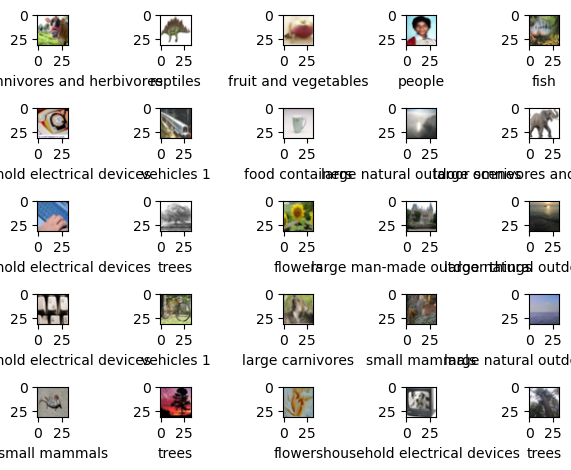

In [5]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

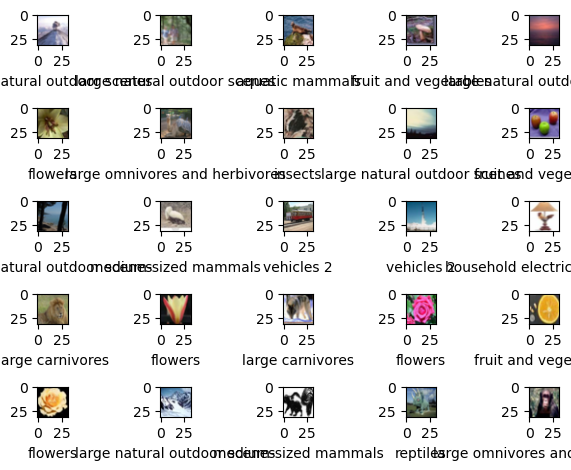

In [6]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(class_names[y_test[i][0]])
plt.tight_layout()
plt.show()

In [7]:
model= keras.models.Sequential()
model.add(layers.Conv2D(64, 3, strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, 3, strides=(1, 1), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, 2, strides=(2, 2), activation='linear'))
model.add(layers.Conv2D(64, 2, strides=(1, 1), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
print(model.summary())

C:\Users\praka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │          46,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,396 (466.39 KB)

 Trainable params: 119,396 (466.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
loss=keras.losses.SparseCategoricalCrossentropy()
optim=keras.optimizers.Adam(0.001)
metrics=["accuracy"]
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [9]:
batch_size=64
epochs=10
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/10
782/782 - 48s - 61ms/step - accuracy: 0.2567 - loss: 2.3996
Epoch 2/10
782/782 - 50s - 64ms/step - accuracy: 0.3761 - loss: 2.0177
Epoch 3/10
782/782 - 49s - 63ms/step - accuracy: 0.4312 - loss: 1.8276
Epoch 4/10
782/782 - 50s - 63ms/step - accuracy: 0.4710 - loss: 1.6940
Epoch 5/10
782/782 - 49s - 63ms/step - accuracy: 0.5025 - loss: 1.5901
Epoch 6/10
782/782 - 50s - 64ms/step - accuracy: 0.5283 - loss: 1.5053
Epoch 7/10
782/782 - 49s - 63ms/step - accuracy: 0.5483 - loss: 1.4401
Epoch 8/10
782/782 - 50s - 64ms/step - accuracy: 0.5673 - loss: 1.3800
Epoch 9/10
782/782 - 50s - 64ms/step - accuracy: 0.5775 - loss: 1.3298
Epoch 10/10
782/782 - 50s - 63ms/step - accuracy: 0.5924 - loss: 1.2848


In [10]:
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 3s - 18ms/step - accuracy: 0.5233 - loss: 1.5661


[1.56606924533844, 0.5232999920845032]

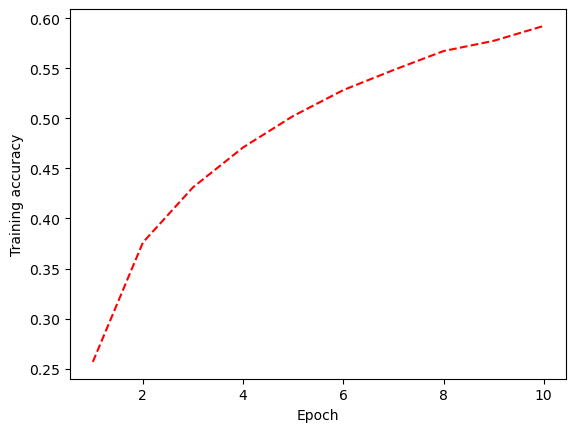

In [11]:
training_acc=history.history['accuracy']
epoch_count=range(1, len(training_acc)+1)
plt.plot(epoch_count, training_acc, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()

In [52]:
nmod=keras.models.Sequential()
nmod.add(layers.Conv2D(64, (7, 7), strides=(2, 2), activation=None, input_shape=(45, 45, 3)))
nmod.add(layers.BatchNormalization())
nmod.add(layers.ReLU())
nmod.add(layers.MaxPool2D((3, 3), strides=(2, 2)))
nmod.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation=None))
nmod.add(layers.BatchNormalization())
nmod.add(layers.ReLU())
nmod.add(layers.Conv2D(128, (3, 3), strides=(1, 1), activation=None))
nmod.add(layers.BatchNormalization())
nmod.add(layers.ReLU())
nmod.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation=None))
nmod.add(layers.BatchNormalization())
nmod.add(layers.ReLU())
nmod.add(layers.Conv2D(512, (3, 3), strides=(1, 1), activation=None))
nmod.add(layers.BatchNormalization())
nmod.add(layers.ReLU())
nmod.add(layers.GlobalAveragePooling2D())
nmod.add(layers.Dense(20))
print(nmod.summary())

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_89 (Conv2D)                   │ (None, 20, 20, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_83 (ReLU)                      │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_84 (ReLU)                      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_85 (ReLU)                      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_86 (ReLU)                      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 1, 1, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_87 (ReLU)                      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_15          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,609,940 (6.14 MB)

 Trainable params: 1,607,892 (6.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

None


In [53]:
loss=keras.losses.SparseCategoricalCrossentropy()
optim=keras.optimizers.Adam(0.00001)
metrics=["accuracy"]
nmod.compile(optimizer=optim, loss=loss, metrics=metrics)

In [54]:
target_size = (45, 45)

x_train_resized = tf.image.resize(x_train, target_size)
x_test_resized = tf.image.resize(x_test, target_size)
batch_size=64
epochs=10
history1=nmod.fit(x_train_resized, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/10
782/782 - 2122s - 3s/step - accuracy: 0.0604 - loss: 9.7044
Epoch 2/10
782/782 - 36s - 46ms/step - accuracy: 0.0812 - loss: 8.1765
Epoch 3/10
782/782 - 39s - 50ms/step - accuracy: 0.0991 - loss: 7.1620
Epoch 4/10
782/782 - 40s - 51ms/step - accuracy: 0.1089 - loss: 6.3815
Epoch 5/10
782/782 - 40s - 51ms/step - accuracy: 0.1132 - loss: 5.8380
Epoch 6/10
782/782 - 40s - 51ms/step - accuracy: 0.1203 - loss: 5.3571
Epoch 7/10
782/782 - 41s - 52ms/step - accuracy: 0.1266 - loss: 4.9899
Epoch 8/10
782/782 - 42s - 53ms/step - accuracy: 0.1317 - loss: 4.6613
Epoch 9/10
782/782 - 59s - 75ms/step - accuracy: 0.1336 - loss: 4.4209
Epoch 10/10
782/782 - 44s - 56ms/step - accuracy: 0.1366 - loss: 4.1869


In [134]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG', 'Cylinders', 'Displacement',  'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df=pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [136]:
df=df.dropna()
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [137]:
origin=df['Origin']
df=df.drop(['Origin'], axis=1)
df['USA']=(origin==1)*1
df['Japan']=(origin==3)*1
df['Europe']=(origin==2)*1
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Japan,Europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [138]:
target_var=df[['MPG']]
df=df.drop(['MPG'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df, target_var, random_state=1, shuffle=True, test_size=0.25)
print(x_train)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
259          6         200.0        85.0  3070.0          16.7          78   
289          8         350.0       155.0  4360.0          14.9          79   
108          4          97.0        88.0  2279.0          19.0          73   
206          4         140.0        72.0  2565.0          13.6          76   
99           6         232.0       100.0  2945.0          16.0          73   
..         ...           ...         ...     ...           ...         ...   
205          4          97.0        75.0  2155.0          16.4          76   
257          6         232.0        90.0  3210.0          17.2          78   
73           8         307.0       130.0  4098.0          14.0          72   
237          4          98.0        63.0  2051.0          17.0          77   
38           8         350.0       165.0  4209.0          12.0          71   

     USA  Japan  Europe  
259    1      0       0  
289    1   

In [139]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print(len(x_train[0]))

9


In [140]:
# scaler2=StandardScaler()
# y_train=scaler2.fit_transform(y_train)
# y_test=scaler2.transform(y_test)
# print(y_train)

In [141]:
model1=keras.models.Sequential()
model1.add(layers.Dense(9, activation='relu', input_shape=(len(x_train[0]),)))
model1.add(layers.Dense(20, activation='linear'))
model1.add(layers.Dense(15, activation='linear'))
model1.add(layers.Dense(5, activation='relu'))
model1.add(layers.Dense(1))
print(model1.summary())

C:\Users\praka\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)                    │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 20)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 691 (2.70 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

None


In [142]:
loss=keras.losses.MeanSquaredError()
optim=keras.optimizers.Adam(0.0069420)
metrics=['accuracy']
model1.compile(loss=loss, optimizer=optim, metrics=metrics)

In [143]:
batch_size=69
epochs=420
history=model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/420
5/5 - 2s - 388ms/step - accuracy: 0.0000e+00 - loss: 585.2101
Epoch 2/420
5/5 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 523.5191
Epoch 3/420
5/5 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 409.6013
Epoch 4/420
5/5 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: 208.3317
Epoch 5/420
5/5 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: 57.7769
Epoch 6/420
5/5 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: 89.8976
Epoch 7/420
5/5 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 28.6231
Epoch 8/420
5/5 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 31.0552
Epoch 9/420
5/5 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: 25.4987
Epoch 10/420
5/5 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 16.3754
Epoch 11/420
5/5 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 16.8321
Epoch 12/420
5/5 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 12.9843
Epoch 13/420
5/5 - 0s - 10ms/step - accuracy: 0.0000e+00 - loss: 11.5981
Epoch 14/420
5/5 - 0s - 11ms/step - accuracy: 0.0000e+00 - lo

In [144]:
model1.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

2/2 - 0s - 100ms/step - accuracy: 0.0000e+00 - loss: 8.3133


[8.313282012939453, 0.0]

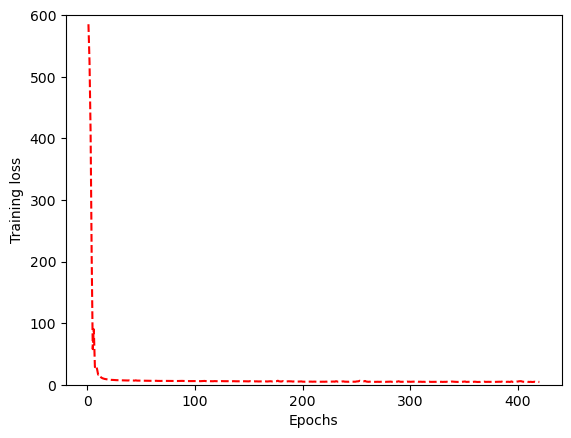

In [145]:
Training_loss=history.history['loss']
epoch_count=range(1, len(Training_loss)+1)
plt.plot(epoch_count, Training_loss, 'r--')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.ylim(0, 600)
plt.show()